任务: 预测酶活性

数据集：T-R-train.csv、T-R-test.csv

数据说明：

酶活性预测实战task：
1、基于T-R-train.csv数据，建立线性回归模型，计算其在T-R-test.csv数据上的r2分数，可视化模型预测结果
2、加入多项式特征（2次、5次），建立回归模型
3、计算多项式回归模型对测试数据进行预测的r2分数，判断哪个模型预测更准确
4、可视化多项式回归模型数据预测结果，判断哪个模型预测更准确
————————————————

版权声明：本文为博主原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接和本声明。
                        
原文链接：https://blog.csdn.net/weixin_46344368/article/details/106739989

In [8]:
#load data
import numpy as np
import pandas as pd

data_train = pd.read_csv('data/T-R-train.csv')
data_test = pd.read_csv('data/T-R-test.csv')

data_train.head()


,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74


In [9]:
#define X_train and y_train
X_train = data_train.loc[:,'T']
y_train = data_train.loc[:,'rate']

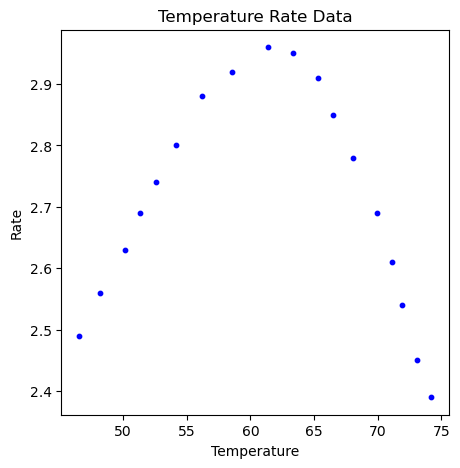

In [10]:
#visualize the temperature rate data
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(5, 5))
plt.scatter(X_train, y_train, s=10, c='b', marker='o')
plt.title('Temperature Rate Data')
plt.xlabel('Temperature')
plt.ylabel('Rate')
plt.show()

In [11]:
X_train = np.array(X_train).reshape(-1, 1)

In [12]:
#linear regression model for temperature rate prediction
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [13]:
#load test data
data_test = pd.read_csv('data/T-R-test.csv')
data_test.head()

,T,rate
0,45.376344,2.334559
1,52.186380,2.775735
2,61.863799,2.930147
3,73.154122,2.488971
4,78.888889,1.981618


In [14]:
#define X_train and y_train
X_test = data_test.loc[:,'T']
y_test = data_test.loc[:,'rate']
X_test = np.array(X_test).reshape(-1,1)


In [15]:

y_train_pred = lr1.predict(X_train)
y_test_pred = lr1.predict(X_test)

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Testing R^2:", r2_score(y_test, y_test_pred))

Training R^2: 0.016665703886981964
Testing R^2: -0.758336343735132


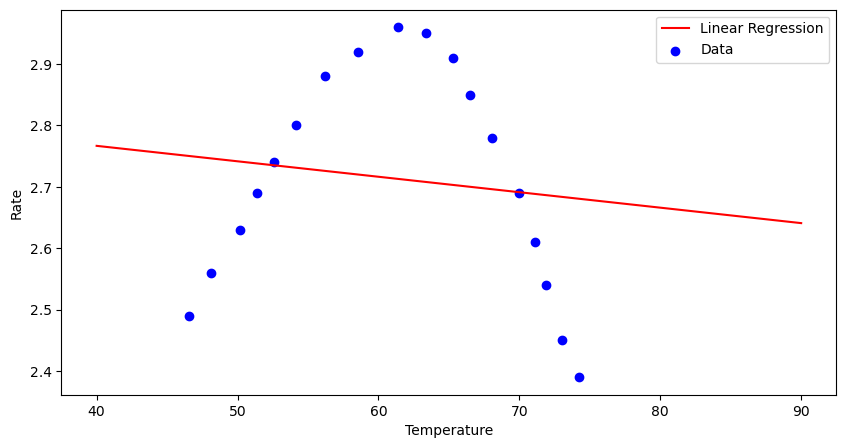

In [16]:
X_range=np.linspace(40,90,300).reshape(-1,1)
y_range_pred=lr1.predict(X_range)
fig2 = plt.figure(figsize=(10,5))
plt.plot(X_range,y_range_pred,color='r',label='Linear Regression')
plt.scatter(X_train,y_train,color='b',label='Data')
plt.xlabel('Temperature')
plt.ylabel('Rate')
plt.legend()
plt.show()

In [17]:
#多项式模型
#generate new features
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)

X_2_train

array([[1.0000000e+00, 4.6530000e+01, 2.1650409e+03],
       [1.0000000e+00, 4.8140000e+01, 2.3174596e+03],
       [1.0000000e+00, 5.0150000e+01, 2.5150225e+03],
       [1.0000000e+00, 5.1360000e+01, 2.6378496e+03],
       [1.0000000e+00, 5.2570000e+01, 2.7636049e+03],
       [1.0000000e+00, 5.4180000e+01, 2.9354724e+03],
       [1.0000000e+00, 5.6190000e+01, 3.1573161e+03],
       [1.0000000e+00, 5.8580000e+01, 3.4316164e+03],
       [1.0000000e+00, 6.1370000e+01, 3.7662769e+03],
       [1.0000000e+00, 6.3340000e+01, 4.0119556e+03],
       [1.0000000e+00, 6.5310000e+01, 4.2653961e+03],
       [1.0000000e+00, 6.6470000e+01, 4.4182609e+03],
       [1.0000000e+00, 6.8030000e+01, 4.6280809e+03],
       [1.0000000e+00, 6.9970000e+01, 4.8958009e+03],
       [1.0000000e+00, 7.1130000e+01, 5.0594769e+03],
       [1.0000000e+00, 7.1890000e+01, 5.1681721e+03],
       [1.0000000e+00, 7.3050000e+01, 5.3363025e+03],
       [1.0000000e+00, 7.4210000e+01, 5.5071241e+03]])

In [18]:
lr2 = LinearRegression()
lr2.fit(X_2_train, y_train)

y_2_train_pred = lr2.predict(X_2_train)
y_2_test_pred = lr2.predict(X_2_test)

print("Training R^2:", r2_score(y_train, y_2_train_pred))
print("Testing R^2:", r2_score(y_test, y_2_test_pred))

Training R^2: 0.970051540068943
Testing R^2: 0.996395455646867


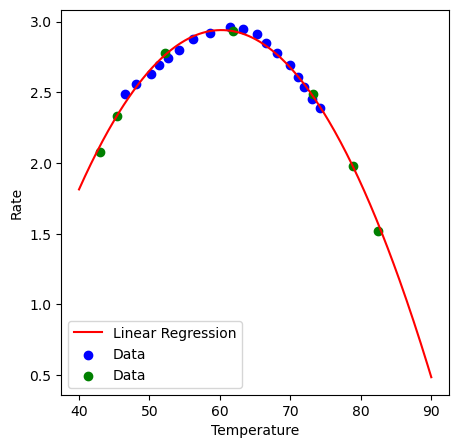

In [19]:
X_range=np.linspace(40,90,300).reshape(-1,1)
X_2_range=poly2.transform(X_range)
y_2_range_pred=lr2.predict(X_2_range)
fig2 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_2_range_pred,color='r',label='Linear Regression')
plt.scatter(X_train,y_train,color='b',label='Data')
plt.scatter(X_test,y_test,color='g',label='Data')
plt.xlabel('Temperature')
plt.ylabel('Rate')
plt.legend()
plt.show()

Training R^2: 0.9978527267142803
Testing R^2: 0.543784598216784


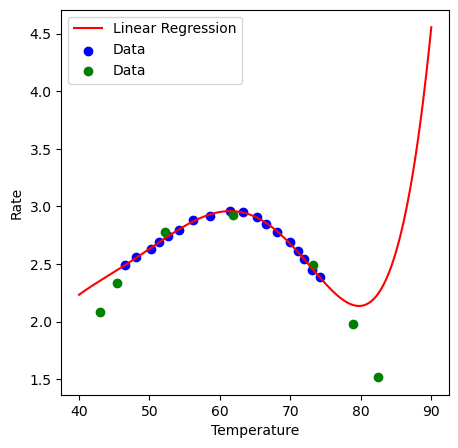

In [20]:
#多项式模型
#generate new features
from sklearn.preprocessing import PolynomialFeatures
poly5 = PolynomialFeatures(degree=5)
X_5_train = poly5.fit_transform(X_train)
X_5_test = poly5.transform(X_test)

lr5 = LinearRegression()
lr5.fit(X_5_train, y_train)

y_5_train_pred = lr5.predict(X_5_train)
y_5_test_pred = lr5.predict(X_5_test)

print("Training R^2:", r2_score(y_train, y_5_train_pred))
print("Testing R^2:", r2_score(y_test, y_5_test_pred))


X_range=np.linspace(40,90,300).reshape(-1,1)
X_5_range=poly5.transform(X_range)
y_5_range_pred=lr5.predict(X_5_range)
fig5 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_5_range_pred,color='r',label='Linear Regression')
plt.scatter(X_train,y_train,color='b',label='Data')
plt.scatter(X_test,y_test,color='g',label='Data')
plt.xlabel('Temperature')
plt.ylabel('Rate')
plt.legend()
plt.show()
